In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Q1. Identify the months with the highest and lowest acquisition rates. What strategies could be implemented to address the fluctuations and ensure consistent growth throughout the year?


In [43]:
#dataset initialization and some light pre-processing:

sales = pd.read_csv('data/Online_Sales.csv')
columns = sales.columns
columns = [str.lower(column) for column in columns]
sales.columns = columns

#change transaction_date to pd.datetime:

sales['transaction_date'] = pd.to_datetime(sales['transaction_date'])
sales.head()

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [44]:
df = sales.loc[:,['customerid' , 'transaction_date']]
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['month'] = pd.to_datetime(df['transaction_date']).dt.month_name()
df['mnum'] = pd.to_datetime(df['transaction_date']).dt.month
df

,customerid,transaction_date,month,mnum
0,17850,2019-01-01,January,1
1,17850,2019-01-01,January,1
2,17850,2019-01-01,January,1
3,17850,2019-01-01,January,1
4,17850,2019-01-01,January,1
...,...,...,...,...
52919,14410,2019-12-31,December,12
52920,14410,2019-12-31,December,12
52921,14410,2019-12-31,December,12
52922,14600,2019-12-31,December,12


In [45]:
#get first transaction
ftransactions = df.groupby('customerid')['transaction_date'].agg('min').reset_index()
#extract month from transaction_date

ftransactions.rename(columns = {'transaction_date':'first_transaction_date'} , inplace = True)
ftransactions['fmonth'] = ftransactions['first_transaction_date'].dt.month
ftransactions['month'] = ftransactions['first_transaction_date'].dt.month_name()
ftransactions

#group by month

acq = ftransactions.groupby('month').agg({'customerid':'nunique' , 'fmonth':'first'}).reset_index().sort_values(by = 'fmonth').set_index('fmonth').rename(columns={'customerid':'acquisitions'})
acq


,month,acquisitions
fmonth,,
1,January,215
2,February,96
3,March,177
4,April,163
5,May,112
6,June,137
7,July,94
8,August,135
9,September,78


Highest customer acquisition month -> January(215)

Lowest customer acquisition month -> November(68)


### Q2. Analyze the data to determine if certain months consistently show higher or lower acquisition rates. How can the company capitalize on high-performing months and improve performance during slower periods?


[]

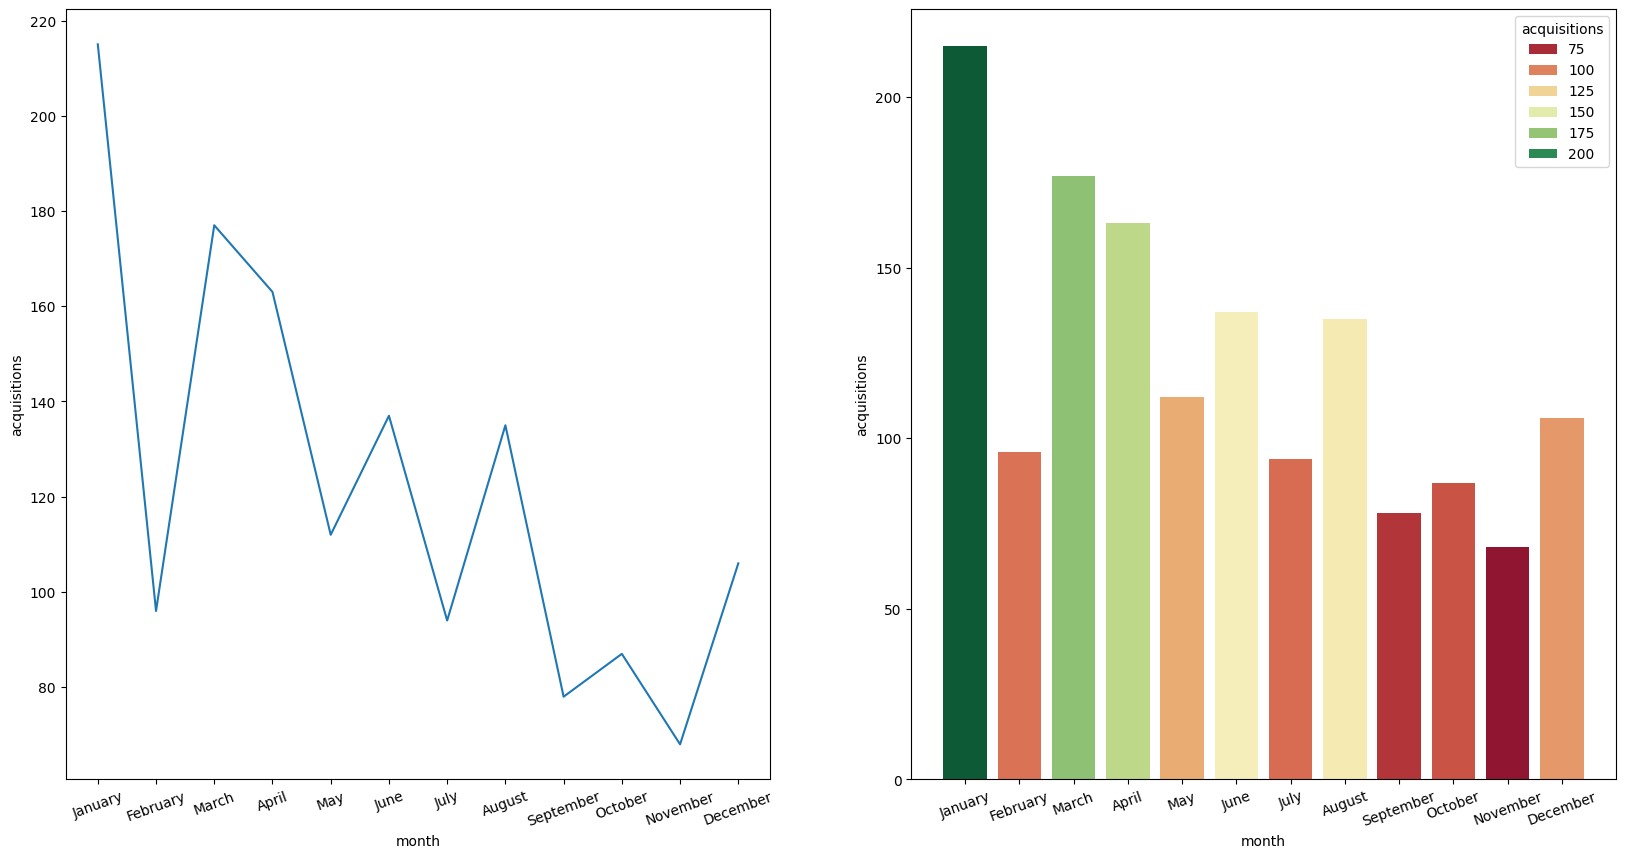

In [46]:
#accusitations throughout the year:
fig , axes = plt.subplots(1,2 , figsize = (20,10))
plt.sca(axes[0])
sns.lineplot(acq , x = 'month' , y = 'acquisitions')
plt.xticks(rotation = 20)
plt.plot()

plt.sca(axes[1])
sns.barplot(acq , x = 'month' , y = 'acquisitions' , hue = 'acquisitions' , palette='RdYlGn')
plt.xticks(rotation = 20)
plt.plot()

### To address the fluctuations in true customer acquisition and ensure consistent monthly growth, here are 7 strategic recommendations, backed by your data:

### 1. Analyze Peak Months and Replicate Success

What the data says: January (215), March (177), April (163) are strong acquisition months.
Strategy:

Audit campaigns/promotions from those months — what worked?

Replicate those strategies in slower months (e.g., Nov, Sep).

✅ Example: If a January promo drove results, launch similar winter promotions in Nov–Dec.

### 2. Boost Engagement in Low-Acquisition Months

Low-performing months: November (68), September (78), October (87)
Strategy:

Introduce “off-season” offers and urgency-driven sales (e.g., flash deals, limited-time discounts).

Leverage email reactivation for dormant leads before low months.

✅ Example: Send “We Miss You!” emails to inactive users in August to boost September.

### 3. Introduce Referral & Loyalty Programs

Why: New customers often come from word-of-mouth, and loyal customers can bring them.
Strategy:

Offer referral incentives for bringing new users.

Introduce loyalty tiers with increasing benefits.

✅ Example: “Refer a friend & both get ₹200 off” or “Gold members get early access to sales.”

### 4. Optimize and Balance Marketing Spend

Use your Marketing_Spend.csv:

Analyze if marketing spend correlates with spikes.

Redistribute budget: Increase spend in weak months, optimize high-CAC months.

✅ Example: Shift ad budget from July–August to September–October if they underperform.

### 5. Align Product Launches with Low Periods

Strategy:

Plan new product drops, bundles, or themes in dull periods.

Tie to relevant cultural or seasonal events (festivals, back-to-school, etc.).

✅ Example: “Tech Essentials for Autumn” bundles in September.

### 6. Personalized Email & SMS Campaigns

Strategy:

Segment customers by first purchase month.

Send tailored messages during similar periods next year to trigger recurring behavior.

✅ Example: A March buyer might respond to a “1-Year Anniversary Offer” in March next year.

### 7. Retarget Website Visitors with Smart Ads

Strategy:

Use pixel-based retargeting to bring back interested users from low-performing periods.

Customize creatives to match products they viewed.

✅ Example: “Still interested in the Nest Thermostat? It’s 10% off this week!”


### Q3. Identify periods with the strongest and weakest retention rates. What strategies could be implemented to improve retention during weaker months?


In [103]:
fdf = ftransactions.loc[:,['customerid' , 'first_transaction_date']]
# fdf

mdf = pd.merge(df , fdf)
repeateddf = mdf[mdf['transaction_date'] > mdf['first_transaction_date']].copy()
repeateddf['fmonth'] = repeateddf['first_transaction_date'].dt.month_name()
repeateddf['fmonthnum'] = repeateddf['first_transaction_date'].dt.month
repeateddf

ret = repeateddf.groupby('fmonth').agg({'customerid':'nunique' , 'mnum' : 'first'}).sort_values(by = 'mnum').reset_index()
ret.rename(columns = {'customerid':'retentions'} , inplace = True)
ret

,fmonth,retentions,mnum
0,January,133,1
1,February,79,2
2,March,120,3
3,April,95,4
4,May,61,5
5,June,67,6
6,July,42,7
7,August,52,8
8,September,19,9
9,October,28,10


[]

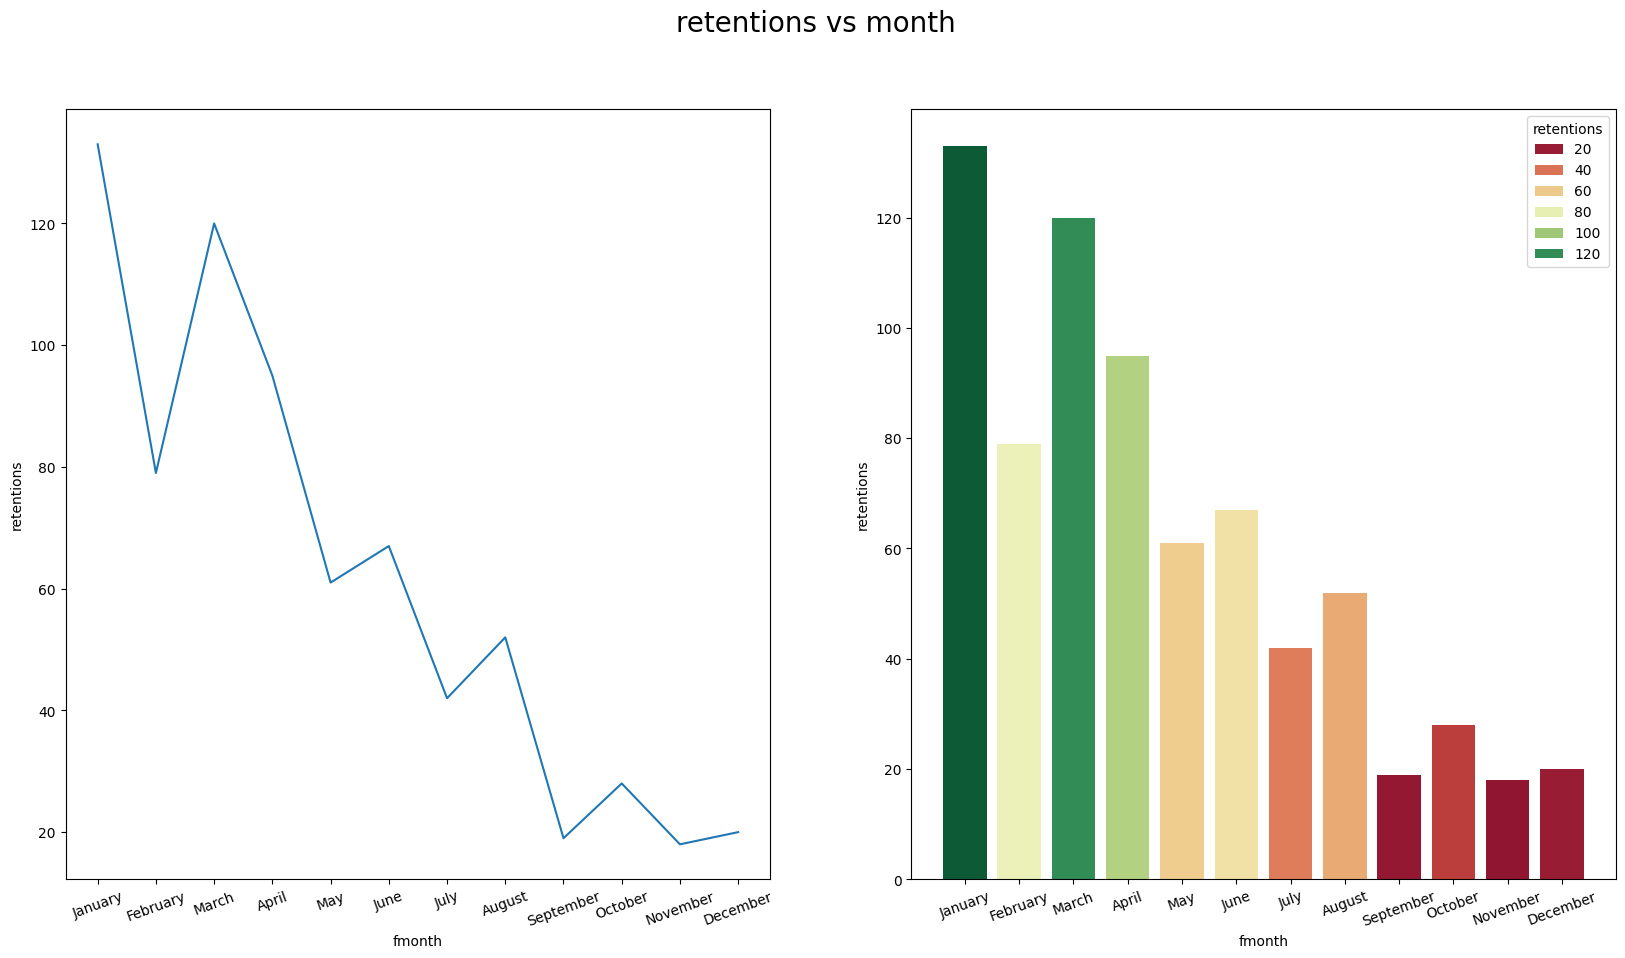

In [105]:
fig , axes = plt.subplots(1, 2, figsize = (20 , 10))

plt.sca(axes[0])
sns.lineplot(ret , x = 'fmonth' , y = 'retentions')
plt.xticks(rotation = 20)
plt.plot()

plt.sca(axes[1])
sns.barplot(ret , x = 'fmonth' , y = 'retentions' , hue = 'retentions' , palette='RdYlGn')
plt.xticks(rotation = 20)
fig.suptitle('retentions vs month' , fontsize = 20)
plt.plot()